In [ ]:
import gensim.downloader as api
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
# from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
wv = api.load('glove-wiki-gigaword-300')

2025-03-17 22:53:03.781085: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 22:53:03.922270: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 22:53:04.520574: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 22:53:04.523078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-17 22:53:06.892673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.0% 56.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.7% 89.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.3% 121.6/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.0% 154.2/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 50.0% 187.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.9% 221.5/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.9% 255.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.8% 288.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.8% 322.7/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.7% 356.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 376.1/376.1MB downloaded


In [4]:
csv1 = "../../data/cleaned/final_clean_data1.csv"
csv2 = "../../data/cleaned/final_clean_data2.csv"
base_texts = pd.read_csv(csv1).iloc[:, 0]
anomaly_texts = pd.read_csv(csv2).iloc[:, 0]

In [5]:
def key_words(column, top_n=20):
    """
    En utilisant la métrique tf-dif, la fonction retourne les top_n premiers mots-clés dans le dataset.
    """
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(column)
    feature_names = vectorizer.get_feature_names_out()
    
    kw_per_text = []
    for doc_idx in range(x.shape[0]):
        # récupérer les scores tf-dif pour le texte courant
        tfidf_scores = x[doc_idx].toarray()[0]

        # associer chaque mot avec son score tf-dif
        word_scores = [(feature_names[i], tfidf_scores[i]) for i in range(len(feature_names))]

        # trier les mots par score décroissant
        sorted_words = sorted(word_scores, key=lambda x: x[1], reverse=True)

        # récupérer les top_n mots-clés
        keywords = [word for word, score in sorted_words[:top_n]]
        kw_per_text.append(keywords)

    return kw_per_text

In [6]:
def contamination_function(data1, data2, contamination_rate=0.5):
    contaminated_texts = []
    contamination_log = []
    data1_kw = key_words(data1)
    data2_kw = key_words(data2)
    
    #on prend 15% des documents 
    df_size = max(1, int(len(data1) * 0.15))  
    selected_indices = random.sample(range(len(data1)), df_size)


    #pour mesurer la similarité entre les mots-clés
    vectorizer = TfidfVectorizer()
    all_keywords = data1_kw + data2_kw
    tfidf_matrice = vectorizer.fit_transform([' '.join(kw) for kw in all_keywords]) #matrice de tout les mots clés
    base_vectors = tfidf_matrice[:len(data1_kw)] 
    anomaly_vectors = tfidf_matrice[len(data1_kw):]
    
    for i in selected_indices:
        base_text = data1[i]
        words = base_text.split()  
        total_words = len(words)
        words_to_contaminate = max(1, int(total_words * contamination_rate))  # mots à contaminer
        # trouver les anomalies les moins similaires (mots clés du text avec toutes les anomalies)
        similarities = cosine_similarity(base_vectors[i], anomaly_vectors)
        best_anomaly_idx = similarities.argmin()
        anomaly_text = data2[best_anomaly_idx]
        anomaly_words = anomaly_text.split()  # les mots de l'anomalie
        # tontaminer les mots du texte de base
        contaminated_words = words[:]
        contaminated_positions = []

        for _ in range(words_to_contaminate):
            # choisir un mot d'anomalie aléatoire
            anomaly_word = random.choice(anomaly_words)
            #position aléatoire dans le document de base
            position = random.randint(0, total_words - 1)

            # mettre le mot à cette position
            contaminated_words[position] = anomaly_word
            contaminated_positions.append((position, anomaly_word))

        #le texte contaminé
        contaminated_text = ' '.join(contaminated_words)
        contaminated_texts.append(contaminated_text)
        data1[i] = contaminated_text

        #résumé des contaminations (à supprimer aprés)
        contamination_log.append({
            "base_text": base_text,
            "contaminated_text": contaminated_text,
            "contaminated_positions": contaminated_positions,
            "anomaly_text": anomaly_text
        })

    return data1, contamination_log, selected_indices

In [7]:
contaminated, log, indices = contamination_function(base_texts, anomaly_texts)
log

[{'base_text': 'stable elevation right_hemidiaphragm_questionable increased_right_basilar_airspace opacity left lung clear heart size normal unremarkable stable elevated right_hemidiaphragm_questionable subtle increased_right_basilar_airspace diseaseatelectasis correlate clinically',
  'contaminated_text': 'sac elevation right_hemidiaphragm_questionable evidence opacity left herniation clear heart size disc unremarkable herniation elevated right_hemidiaphragm_questionable subtle evidence diseaseatelectasis evidence noted',
  'contaminated_positions': [(16, 'evidence'),
   (10, 'disc'),
   (6, 'evidence'),
   (0, 'herniation'),
   (0, 'sac'),
   (12, 'herniation'),
   (18, 'evidence'),
   (3, 'evidence'),
   (6, 'herniation'),
   (19, 'noted')],
  'anomaly_text': 'evidence disc herniation significant thecal sac nerve root compression noted'},
 {'base_text': 'heart normal size contour lung clear without evidence infiltrate pneumothora effusion acute cardiopulmonary disease',
  'contamina

In [8]:
def vectorisation_glove(data, wv, indice_anomalie=None):
    """
    Fonction qui vectorise les données textuelles en utilisant le modèle GLOVE, puis réduit les dimensions 
    des vecteurs pour les afficher graphiquement dans un espace 2D.
    
    - data : liste de document (chaque texte sera vectorisé mot par mot, puis moyenné).
    - wv : Le modèle GLOVE chargé ('glove-wiki-gigaword-300').
    - indice_anomalie : les indices des documents ou on a injecté des anomalies. 
    
    retourne la liste des vecteurs correspondant aux textes ou chaque document sera présenté par un point.
    """
    
    def vectoriser_texte(texte, wv, embedding_dim=300):
        """
        Vectorise un texte en moyennant les vecteurs de ses mots. 
        Si un mot n'existe pas dans le modèle GLOVE, il est ignoré.
        """
        mots = texte.split()
        vecteurs = [wv[mot] for mot in mots if mot in wv]  # extraire les vecteurs des mots existants dans GLOVE
        return np.mean(vecteurs, axis=0) if vecteurs else np.zeros(embedding_dim)  # retourner le vecteur moyen

    # vectorisation de tous les textes
    vecteurs = [vectoriser_texte(texte, wv) for texte in data]
    vecteurs = np.array(vecteurs)

    # réduction de la dimension avec t-SNE
    tsne = TSNE(n_components=2, random_state=42)  # réduire à 2 dimensions
    vecteurs_2d = tsne.fit_transform(vecteurs)  # appliquer t-SNE
    
    # couleurs des points ( rouge : anomalie, bleu : noraml)
    couleurs = ['b'] * len(data)
    if indice_anomalie:
        for i in indice_anomalie:
            if 0 <= i < len(data): 
                couleurs[i] = 'r'

    # affichage graphique des données dans l'espace 2D
    plt.figure(figsize=(60, 30)) 
    plt.scatter(vecteurs_2d[:, 0], vecteurs_2d[:, 1], c=couleurs, marker='o') 

    plt.title("Représentation graphique des documents vectorisés")
    plt.grid(True)
    #plt.savefig("output.jpg")
    plt.show()
    return vecteurs


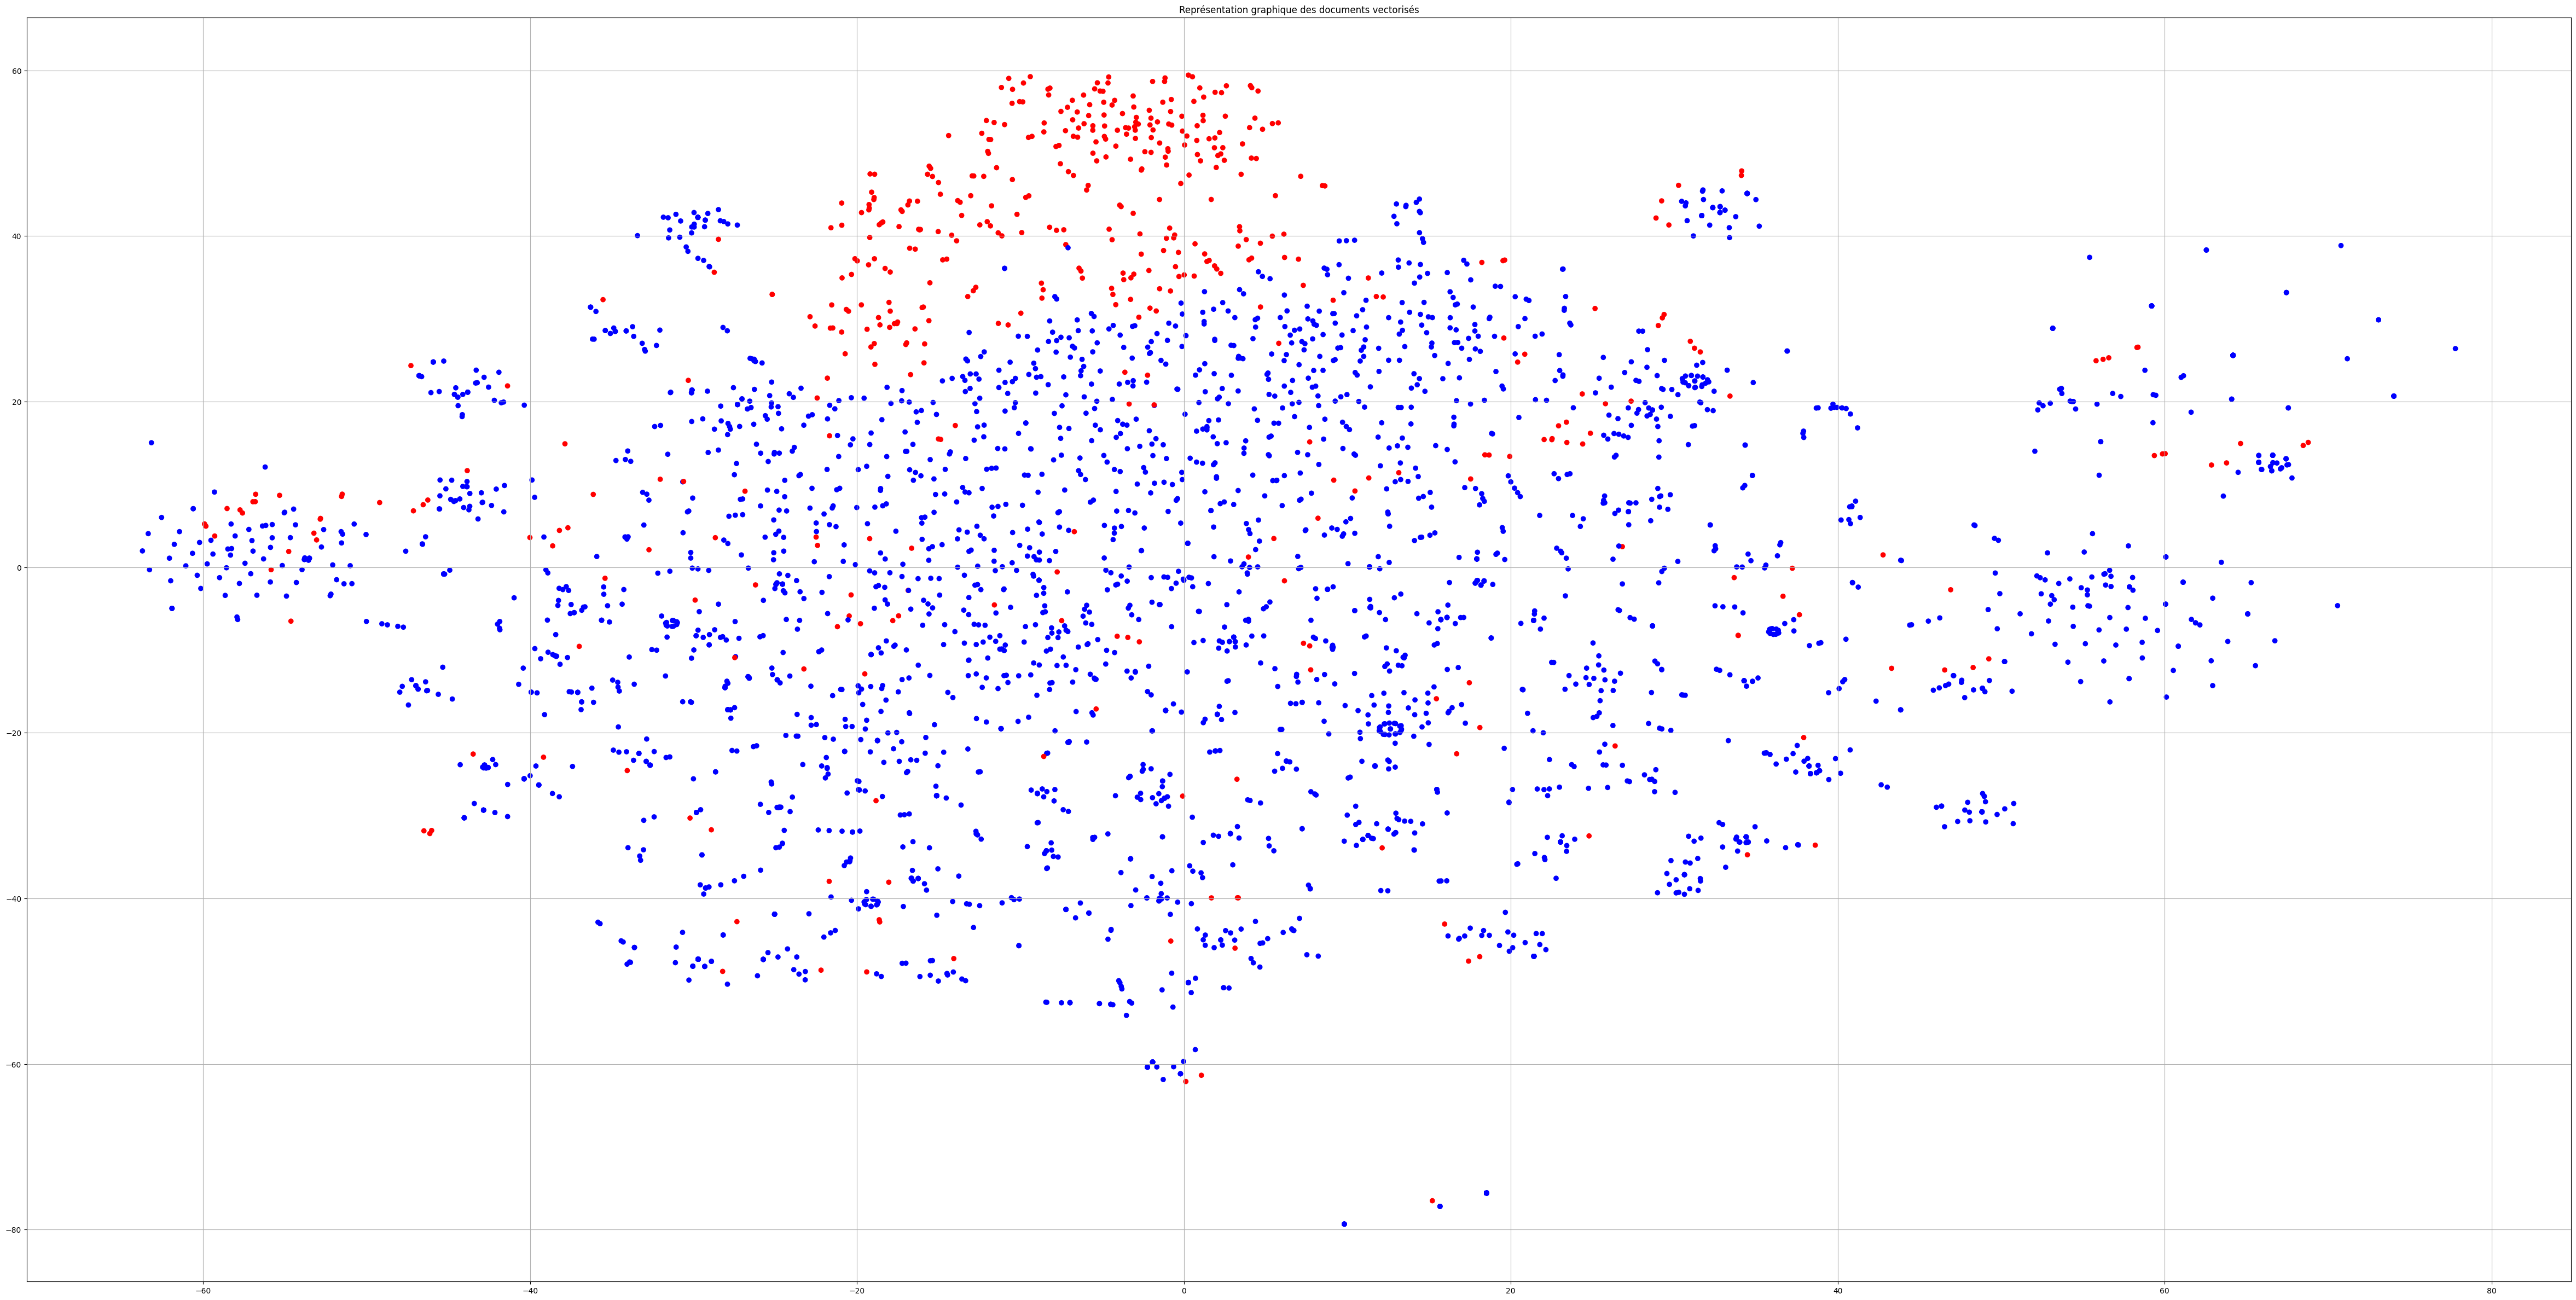

In [9]:
anomalie1 = vectorisation_glove(contaminated, wv, indices)

In [16]:
def contamination_function_bis(data1, data2, contamination_rate=0.1):
    """
    Fonction qui génère des anomalie dans notre jeu de données data1, en injectant des donnée de data2.
    
    - data1 : Corpus de données sain
    - data2 : Corpus de données considérées "anomalie"
    - contamination_rate : le taux de document contaminé par rapport a la taille de data1
    
    retourne un nouveau corpus de données avec des anomalies + les indices des anomalies
    """
    contamination_log = []
    
    #on contamine % des documents dans data1 
    df_size = max(1, int(len(data1) * contamination_rate))  
    selected_indices = random.sample(range(len(data1)), df_size)
    
    for i in selected_indices:
        base_text = data1[i]
        new_text = random.choice(data2)
        data1[i] = new_text  # remplacement de la ligne 

        # un log pour surveiller le fonctionnement de la fonction (à ajouter dans le return)
        contamination_log.append({
            "base_text": base_text,  # le texte original avant remplacement
            "contaminated_text": new_text,  # le texte après remplacement
            "index_replaced": i  # l'index de la ligne modifiée
        })

    return data1, selected_indices

In [17]:
data_new, ind= contamination_function_bis(base_texts, anomaly_texts)

In [18]:
#data_new.to_csv("contaminated_data.csv", index = False)

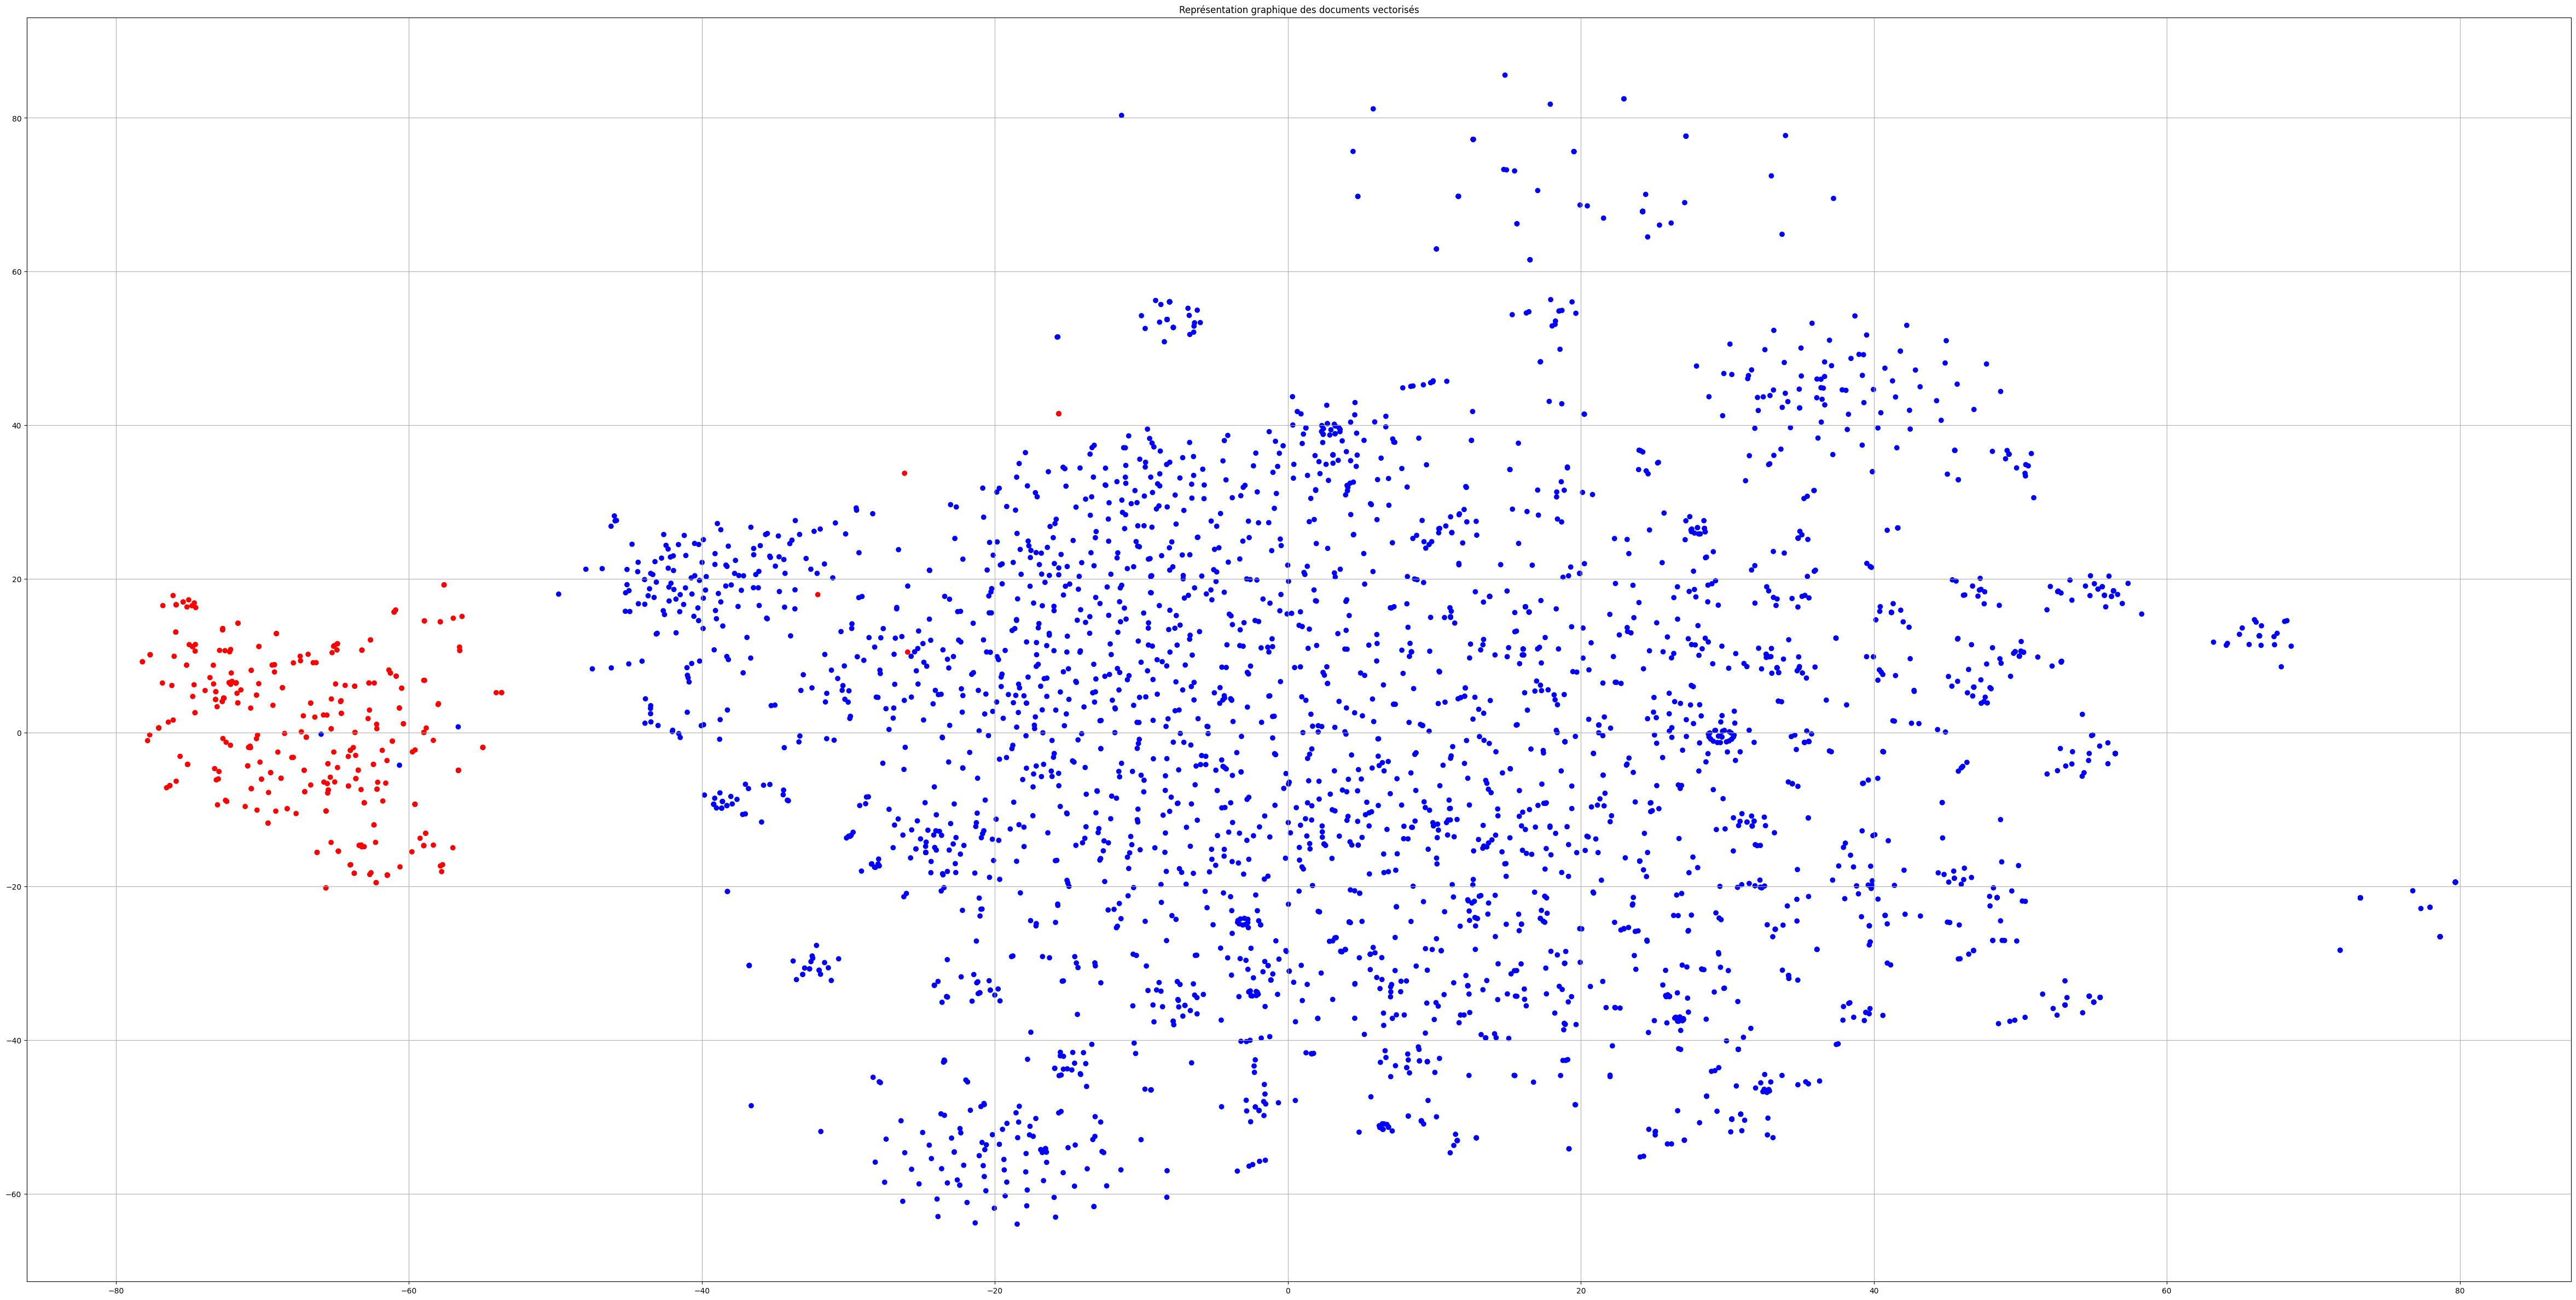

In [19]:
X_glove = vectorisation_glove(data_new, wv, ind)

In [12]:
# import numpy as np
# from sklearn.ensemble import IsolationForest
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(X_glove, test_size=0.2, random_state=42)

# # Initialisation et entraînement du modèle sur les données d'entraînement
# model_iforest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
# model_iforest.fit(X_train)

# # Prédiction sur l'ensemble d'entraînement et de test
# y_pred_train = model_iforest.predict(X_train)
# y_pred_test = model_iforest.predict(X_test)


In [13]:
#Normalisation
# scaler = StandardScaler()
# scaled_embeddings = scaler.fit_transform(embeddings)

In [10]:
#X_train, X_test = train_test_split(anomalie1, test_size=0.3, random_state=42)

In [75]:
vecteur_dim = anomalie1.shape[1]

In [82]:
input_layer = keras.Input(shape=(vecteur_dim,))
# Encodeur
encoder = layers.Dense(128, activation='relu')(input_layer)
encoder = layers.Dense(64, activation='relu')(encoder)

# Décodeur
decoder = layers.Dense(128, activation='relu')(encoder)
decoder = layers.Dense(vecteur_dim, activation='linear')(decoder) 

# Modèle complet
autoencoder = keras.Model(input_layer, decoder)

# Compiler le modèle
autoencoder.compile(optimizer='adam', loss='mse')


In [62]:
autoencoder.fit(
    anomalie1, anomalie1,
    epochs=50,
    batch_size=32,
    shuffle=True
)

Epoch 1/50
107/107 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 8/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 9/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 10/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 11/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 12/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 13/50
107/107 [====

In [63]:
reconstructed = autoencoder.predict(anomalie1)

107/107 [==============================] - 0s 1ms/step


In [64]:
error = np.mean(np.square(anomalie1 - reconstructed))

In [65]:
error

0.0011658689480005886

In [66]:
tsne = TSNE(n_components=2, random_state=42)  # réduire à 2 dimensions
reconstructed_2d = tsne.fit_transform(reconstructed)  # appliquer t-SNE

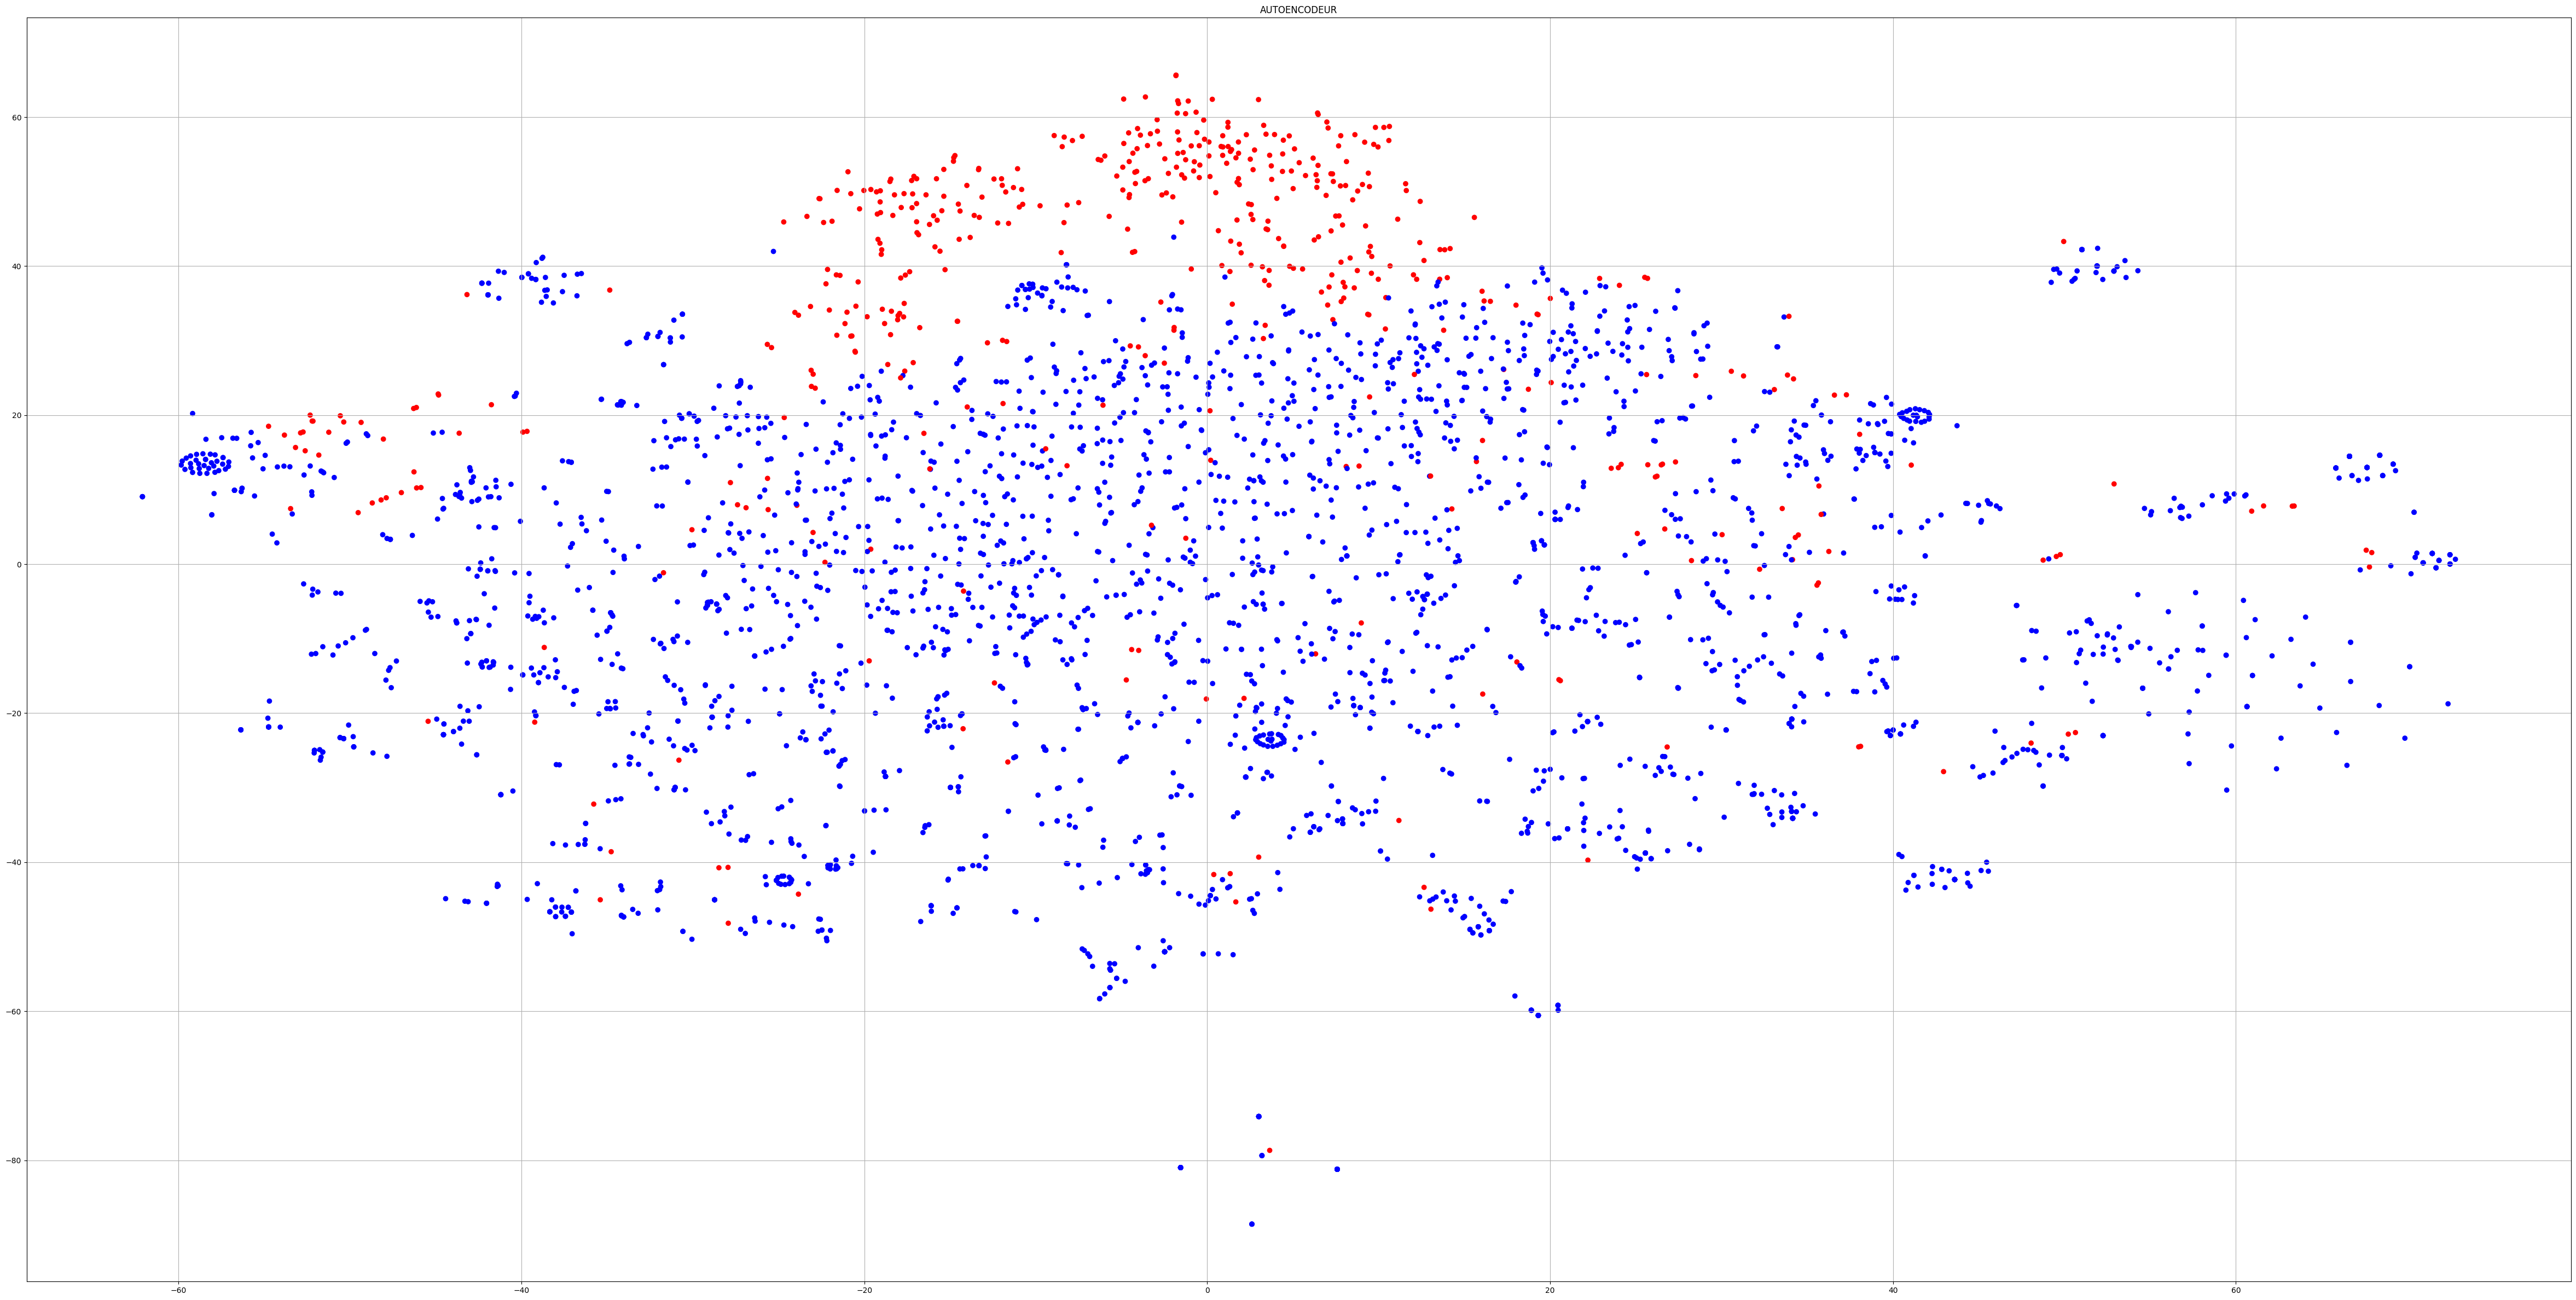

In [67]:
# couleurs des points ( rouge : anomalie, bleu : noraml)
couleurs = ['b'] * len(anomalie1)
for i in indices:
    if 0 <= i < len(anomalie1): 
        couleurs[i] = 'r'

# affichage graphique des données dans l'espace 2D
plt.figure(figsize=(60, 30)) 
plt.scatter(reconstructed_2d[:, 0], reconstructed_2d[:, 1], c=couleurs, marker='o') 

plt.title("AUTOENCODEUR")
plt.grid(True)
#plt.savefig("output.jpg")
plt.show()

In [19]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [20]:
i_forest = isolation_forest.predict(X_train)

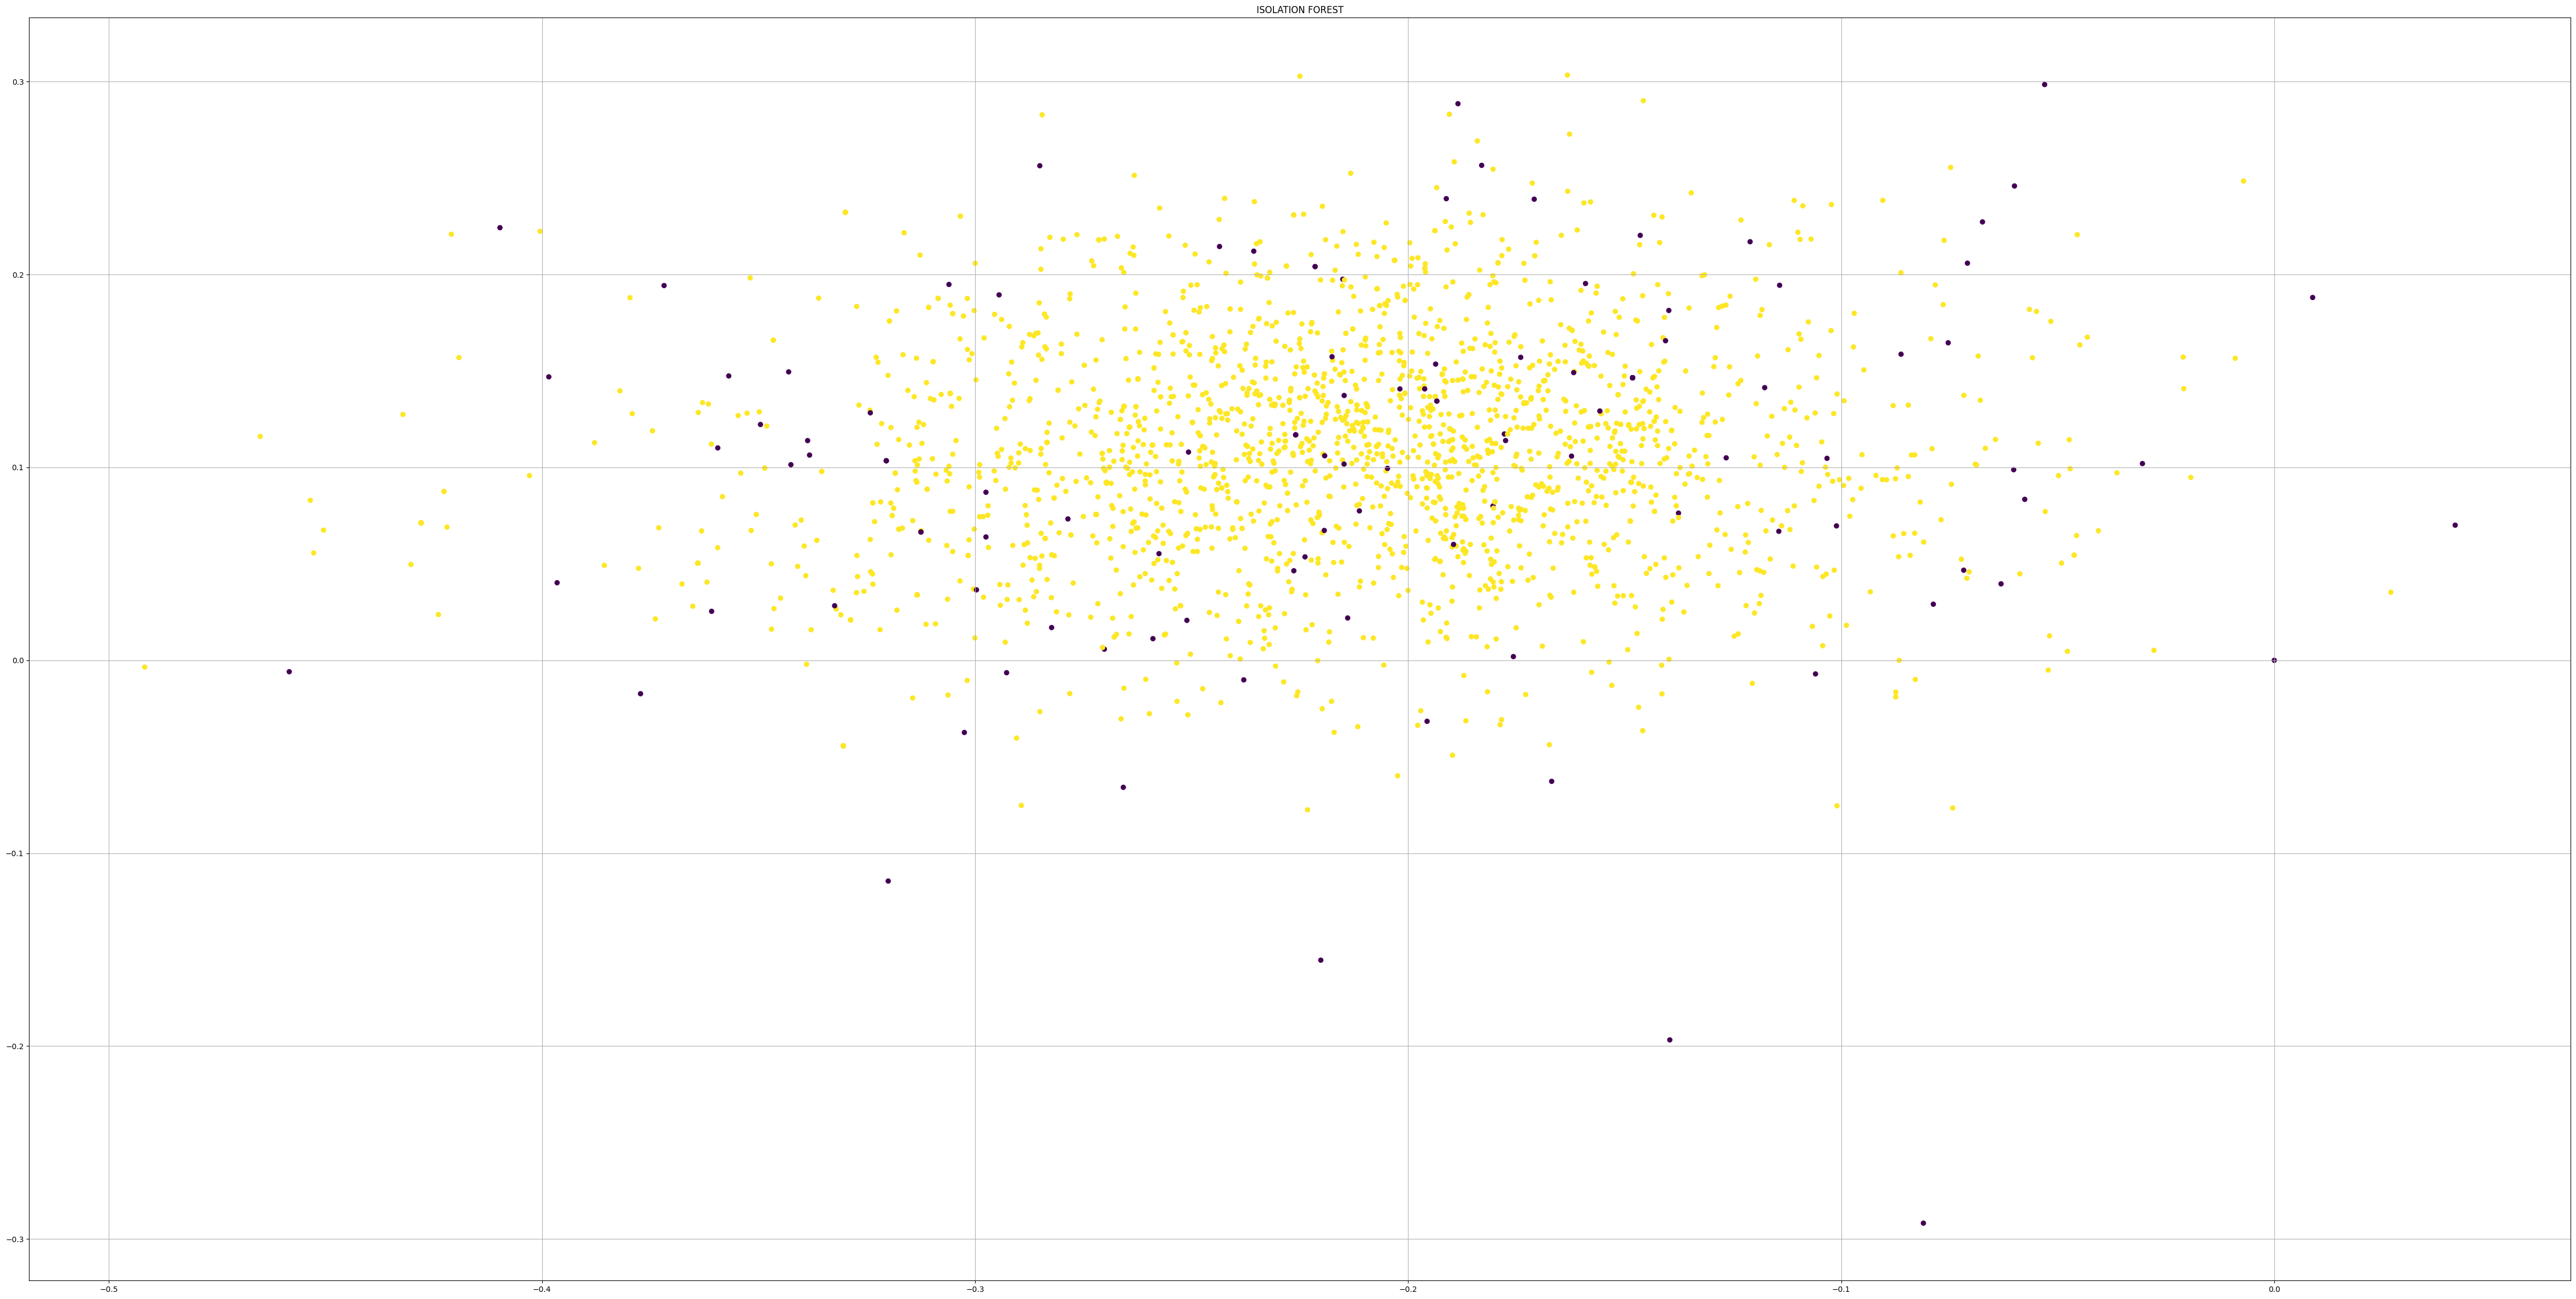

In [21]:
# couleurs des points ( rouge : anomalie, bleu : noraml)
couleurs = ['b'] * len(anomalie1)
for i in indices:
    if 0 <= i < len(anomalie1): 
        couleurs[i] = 'r'

# affichage graphique des données dans l'espace 2D
plt.figure(figsize=(60, 30)) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=i_forest, marker='o') 

plt.title("ISOLATION FOREST")
plt.grid(True)
#plt.savefig("output.jpg")
plt.show()

In [22]:
oc_svm = OneClassSVM(nu=0.05, kernel='rbf')
oc_svm.fit(X_train)

OneClassSVM(nu=0.05)

In [23]:
svm = oc_svm.predict(X_train)

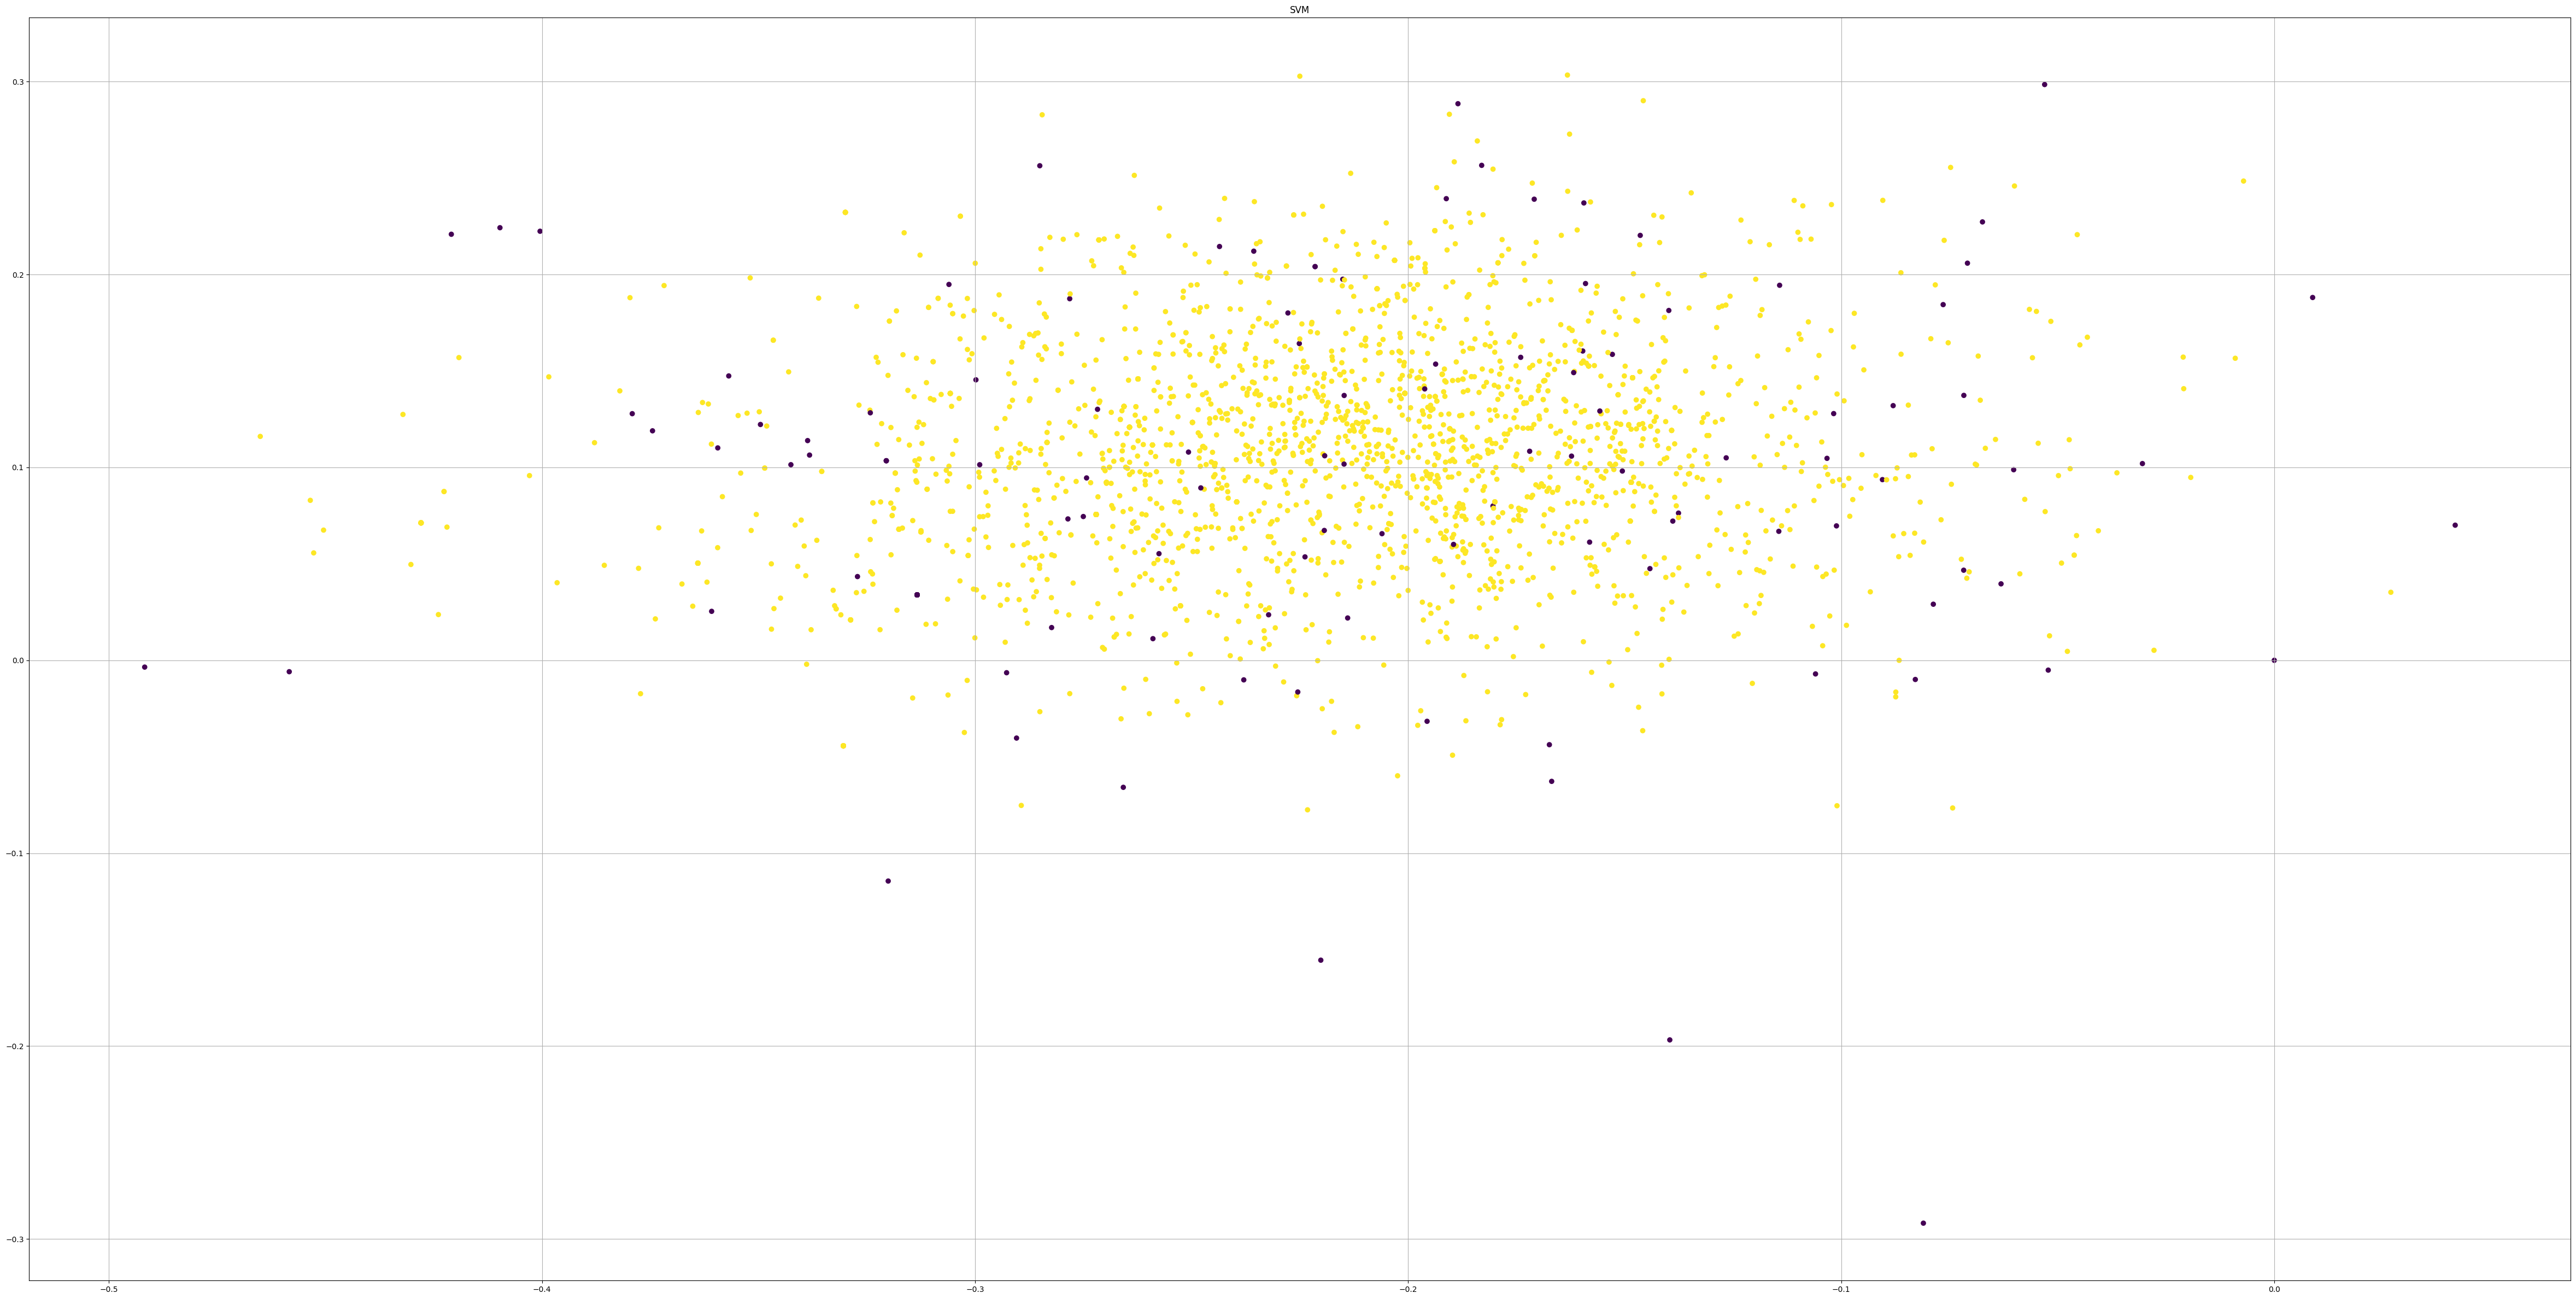

In [24]:
plt.figure(figsize=(60, 30)) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=svm, marker='o') 

plt.title("SVM")
plt.grid(True)
#plt.savefig("output.jpg")
plt.show()


Matrice de confusion pour Isolation Forest:
[[2675  232]
 [ 402  110]]

Matrice de confusion pour One-Class SVM:
[[2645  262]
 [ 419   93]]
107/107 [==============================] - 0s 1ms/step

Matrice de confusion pour Autoencoder:
[[2793  114]
 [ 455   57]]

=== Isolation Forest ===
Precision: 0.3216, Recall: 0.2148, F1-Score: 0.2576, AUC: 0.5675, Accuracy: 0.8146, MCC: 0.1606, Time: 0.64s

=== One-Class SVM ===
Precision: 0.2620, Recall: 0.1816, F1-Score: 0.2145, AUC: 0.5458, Accuracy: 0.8008, MCC: 0.1070, Time: 0.65s

=== Autoencoder ===
Precision: 0.3333, Recall: 0.1113, F1-Score: 0.1669, AUC: 0.5361, Accuracy: 0.8336, MCC: 0.1180, Time: 10.54s


/tmp/ipykernel_7992/2691023506.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(models.keys(), rotation=20)


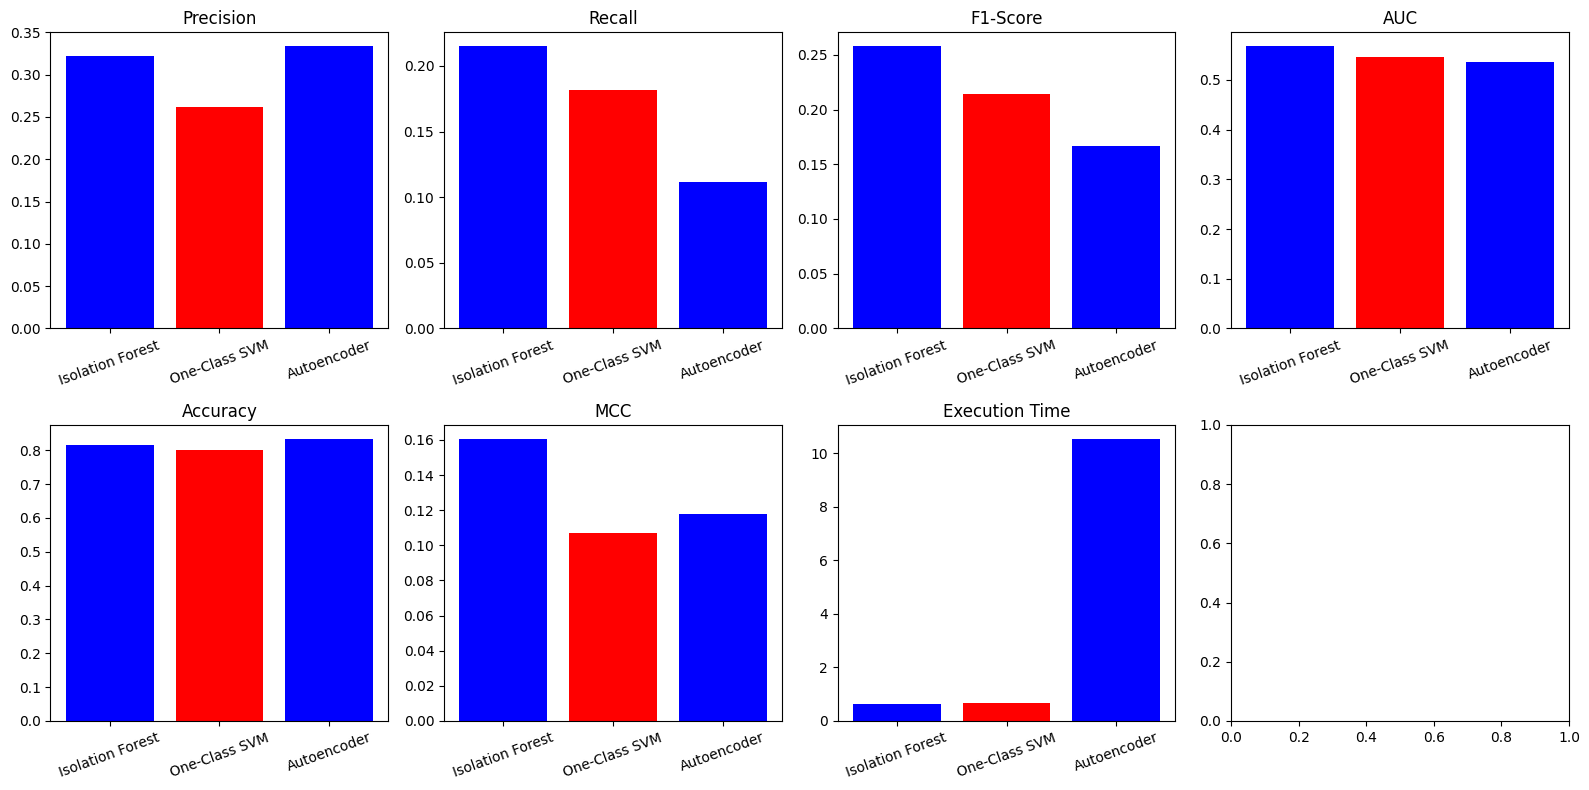

In [87]:
import time
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support, accuracy_score, matthews_corrcoef, confusion_matrix
labels = [0] * len(base_texts)
for i in indices:
    labels[i] = 1
    
X = anomalie1
y = np.array(labels)

models = {
    "Isolation Forest": IsolationForest(contamination=0.1, random_state=42),
    "One-Class SVM": OneClassSVM(nu=0.1, kernel='rbf', gamma='auto'),
     "Autoencoder": autoencoder
}

results = {}
execution_times = {}

for name, model in models.items():
    start_time = time.time()
    if name == "Autoencoder":
        model.fit(
                                X, X,
                                epochs=50,
                                batch_size=32,
                                shuffle=True,
                                verbose=0
                            )
        reconstructions = model.predict(X)
        mse = np.mean(np.power(X - reconstructions, 2), axis=1)
        threshold = np.percentile(mse, 95)
        y_pred = (mse > threshold).astype(int)
    else:
        y_pred = model.fit_predict(X)
        y_pred = np.where(y_pred == -1, 1, 0)  
    execution_times[name] = time.time() - start_time  
        
    cm = confusion_matrix(y, y_pred)
    print(f"\nMatrice de confusion pour {name}:\n{cm}")
    
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    auc_score = roc_auc_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    
    results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc_score,
        "Accuracy": accuracy,
        "MCC": mcc,
        "Confusion Matrix": cm.tolist(),
        "Execution Time": execution_times[name]
    }

for model, res in results.items():
    print(f"\n=== {model} ===")
    print(f"Precision: {res['Precision']:.4f}, Recall: {res['Recall']:.4f}, F1-Score: {res['F1-Score']:.4f}, AUC: {res['AUC']:.4f}, Accuracy: {res['Accuracy']:.4f}, MCC: {res['MCC']:.4f}, Time: {res['Execution Time']:.2f}s")

metrics = ["Precision", "Recall", "F1-Score", "AUC", "Accuracy", "MCC", "Execution Time"]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in models]
    axes[i].bar(models.keys(), values, color=['blue', 'red'])
    axes[i].set_title(metric)
    axes[i].set_xticklabels(models.keys(), rotation=20)

plt.tight_layout()
plt.show()